In [20]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [2]:
output = pd.read_csv("gpt35_output.csv")

In [7]:
output.drop(['Unnamed: 0'], axis=1, inplace= True)

In [10]:
output.head(3)

,debate_id,utterance_id,split,title,speakers,dialogue_history,debate_result,ans_speaker,ans_role,ans_text,prompt,pred_response,pred_speaker,pred_role,pred_intervene,gt_intervene
0,20148,20230_0,test,Prohibit Genetically Engineered Babies,John Donvan<mod>: Author and correspondent for...,John Donvan (role: mod): The question I'm aski...,"{'breakdown': {'against_for': 4.5, 'undecided_...",John Donvan,mod,Yeah.,In your capacity as the moderator of this deba...,Let's stay focused on the current topic of gen...,John Donvan,mod,True,True
1,20148,20204_0,test,Prohibit Genetically Engineered Babies,John Donvan<mod>: Author and correspondent for...,"John Donvan (role: mod): Nita, do you want to ...","{'breakdown': {'against_for': 4.5, 'undecided_...",John Donvan,mod,So do you concede that point to them?,In your capacity as the moderator of this deba...,"Nita, please provide evidence to support your ...",John Donvan,mod,True,True
2,20148,20232_0,test,Prohibit Genetically Engineered Babies,John Donvan<mod>: Author and correspondent for...,"Lord Robert Winston (role: for): In June 2000,...","{'breakdown': {'against_for': 4.5, 'undecided_...",John Donvan,mod,How far do you want it to go?,In your capacity as the moderator of this deba...,"Nita Farahany, please respond to the question ...",John Donvan,mod,True,True


In [12]:
report = {
        "speaker accuracy": (output["pred_speaker"] == output["ans_speaker"]).sum() / len(output),
        "role accuracy": (output["pred_role"] == output["ans_role"]).sum() / len(output),
        "moderation accuracy": (output["pred_intervene"] == output["gt_intervene"]).sum() / len(output),
    }
report

{'speaker accuracy': 0.4397705544933078,
 'role accuracy': 0.45506692160611856,
 'moderation accuracy': 0.49521988527724664}

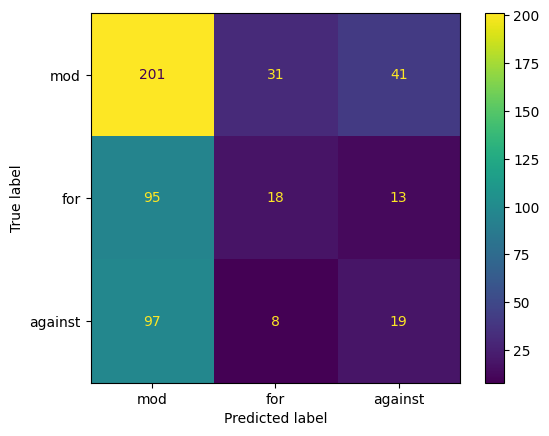

In [22]:
cm = confusion_matrix(output["ans_role"], output["pred_role"], labels=["mod", "for", "against"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["mod", "for", "against"])
disp.plot()
plt.show()

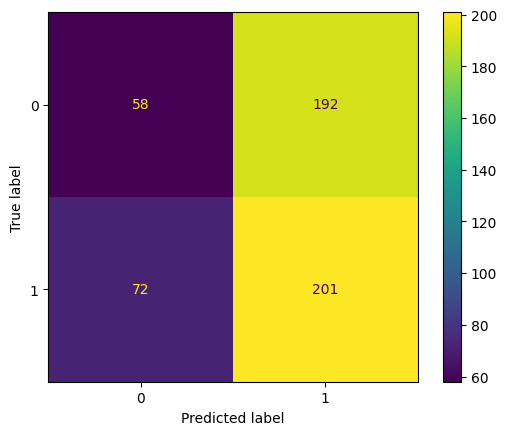

In [23]:
cm = confusion_matrix(output["gt_intervene"], output["pred_intervene"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()